# AI BOT FOR MEDICINE-EDEMA

## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

## Directories For the Datasets

In [2]:
train_dir = r"C:\Users\thangaperumale\Downloads\Edema data\Edema\img_data\Train"
val_dir = r"C:\Users\thangaperumale\Downloads\Edema data\Edema\img_data\Validation"
test_dir = r"C:\Users\thangaperumale\Downloads\Edema data\Edema\img_data\Test"

## Data Preparation For Training, Validation and Testing

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

## Train, Validation and Test Generators

In [4]:
# Training generator
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Validation generator
val_gen = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Test generator
test_gen = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # No shuffling for test data
)

Found 800 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


## Building the CNN Model

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

## Compile and Train the Model

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen
)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.5546 - loss: 0.6976 - val_accuracy: 0.5100 - val_loss: 0.6681
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6107 - loss: 0.6644 - val_accuracy: 0.5500 - val_loss: 0.6618
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.6059 - loss: 0.6493 - val_accuracy: 0.6700 - val_loss: 0.6177
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.6363 - loss: 0.6255 - val_accuracy: 0.7600 - val_loss: 0.6106
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.6458 - loss: 0.6402 - val_accuracy: 0.6700 - val_loss: 0.6822
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.6195 - loss: 0.6701 - val_accuracy: 0.7600 - val_loss: 0.5619
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.6821 - loss: 0.6091 - val_accuracy: 0.7300 - val_loss: 0.5599
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.6437 - loss: 0.6281 - val_accuracy: 0.7800 - val_loss:

## Evaluation of the Model on the Test Set

In [8]:
test_loss, test_accuracy = model.evaluate(test_gen)
print(f"Test Accuracy: {test_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 456ms/step - accuracy: 0.8344 - loss: 0.4229
Test Accuracy: 0.8100


## Plotting the Training History

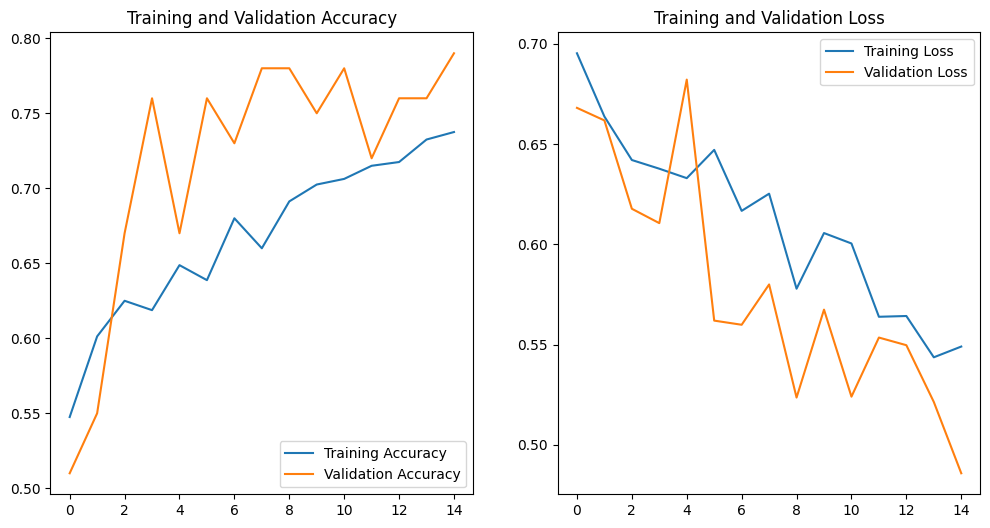

In [9]:
# Plot training & validation accuracy/loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Save the trained model

In [10]:
model.save('edema_detection_model.h5')

## Load New Image To Check Whether it is Edema or Not

In [11]:
import numpy as np
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image

In [12]:
# Function to load and preprocess a single image
def load_and_preprocess_image(image_path):
    # Load the image with the target size used in training
    img = image.load_img(image_path, target_size=(224, 224))
    
    # Convert the image to an array and rescale
    img_array = image.img_to_array(img) / 255.0
    
    # Expand dimensions to create a batch of size 1
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to predict edema on a single image
def predict_edema(image_path):
    # Load the trained model if not already in memory
    model = load_model('edema_detection_model.h5')
    
    # Preprocess the input image
    img_array = load_and_preprocess_image(image_path)
    
    # Make prediction
    prediction = model.predict(img_array)[0][0]  # Single output for binary classification

    # Interpret the prediction
    if prediction > 0.5:
        print("Prediction: Edema detected.")
    else:
        print("Prediction: No Edema detected.")
    print(f"Prediction Accuracy: {prediction:.4f}")

# Example usage for predicting edema in a new image
predict_edema(r"C:\Users\thangaperumale\Downloads\Pneumonia\archive\chest_xray\test\PNEUMONIA\person734_virus_1355.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Prediction: Edema detected.
Prediction Accuracy: 0.7120
